In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

df_angry = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(angry).csv')
df_happy = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(happy).csv')
df_sad = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(sad).csv')
df_main = pd.concat([df_angry, df_happy, df_sad])
df_main = df_main.reset_index(drop=True)

# Remove duplicates
df_main = df_main.drop_duplicates(subset=['content', 'sentiment'])
df_main = df_main.reset_index(drop=True)

# Remove empty data
df_main['content'].replace('', np.nan, inplace=True)
df_main = df_main.dropna(subset = ['content'])
df_main = df_main.reset_index(drop=True)

In [2]:
df = df_main.drop_duplicates(subset='content', keep="first")

In [5]:
df.columns

Index(['content', 'sentiment'], dtype='object')

In [3]:
df['sentiment'].replace({'happy':1,'angry':0,'sad':2},inplace=True)

E:\anada\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
sad= df[df['sentiment']==2]['content']
print('<sad> : ',sad.values[1] )

<sad> :  Don’t expect me to tell you what you did wrong. If you can’t figure it out yourself, then you are not ready to correct it,cos you did not know it was a mistake.


In [7]:
happy = df[df['sentiment']==1]['content']
print('<happy> : ',happy.values[1])

<happy> :  Love is a long sweet dream & marriage is an alarm clock..


In [8]:
angry = df[df['sentiment']==0]['content']
print('<angry> : ',angry.values[1])

<angry> :  Not available for busy people☺


In [15]:
# import plotly.express as px
# fig = px.bar(df, x=['sad','happy','angry'] , y=df['sentiment'].value_counts(),height=400,template="plotly_dark")

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     )
# fig.show()

In [16]:
df['sentiment'].value_counts()

1    703
0    498
2    385
Name: sentiment, dtype: int64

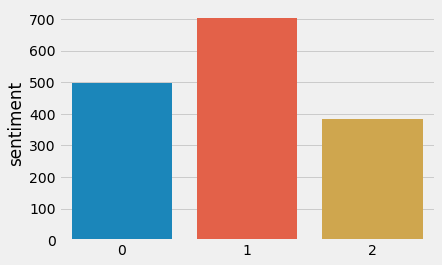

In [17]:
sns.barplot(df['sentiment'].value_counts().index,df['sentiment'].value_counts())

In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [19]:
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
chatbot = pd.read_csv("E:/谷歌下载/kaggle-nlp/Emotion(sad).csv",encoding='latin-1')
resume = pd.read_csv("E:/谷歌下载/kaggle-nlp/Emotion(happy).csv",encoding='latin-1')
a=pd.read_csv("E:/谷歌下载/kaggle-nlp/Emotion(angry).csv",encoding='latin-1')

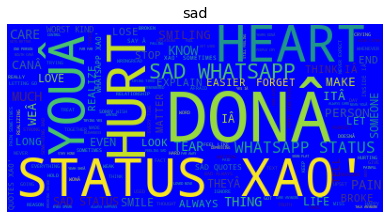

In [23]:
chatbot['sentiment'].value_counts()
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.title("sad")
cloud(chatbot['content'])

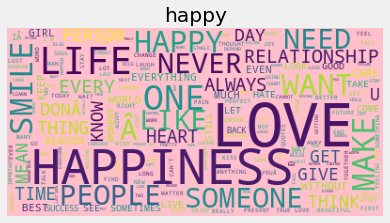

In [67]:
def cloud(text):
    wordcloud = WordCloud(background_color="pink",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.title("happy")
cloud(resume['content'])

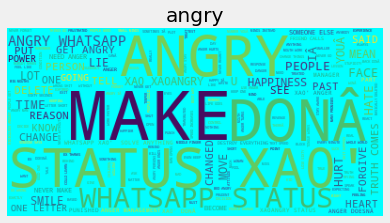

In [68]:
def cloud(text):
    wordcloud = WordCloud(background_color="cyan",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.title("angry")
cloud(a['content'])

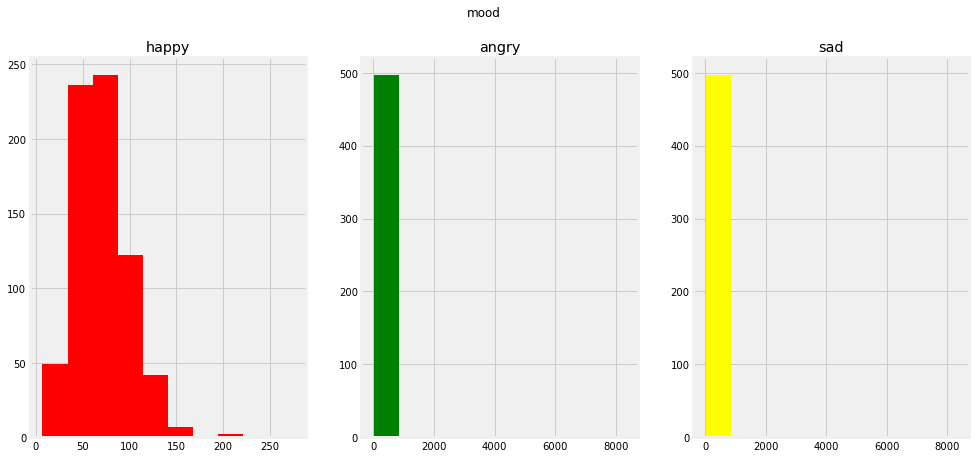

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,7))
happy=df[df['sentiment']==1]['content'].str.len()
ax1.hist(happy,color='red')
ax1.set_title('happy')
angry=df[df['sentiment']==0]['content'].str.len()
ax2.hist(angry,color='green')
ax2.set_title('angry')
sad=df[df['sentiment']==2]['content'].str.len()
ax3.hist(angry,color='yellow')
ax3.set_title('sad')

fig.suptitle('mood')
plt.show()

Text(0.5, 0.98, ' average word length in angry and happy and sad')

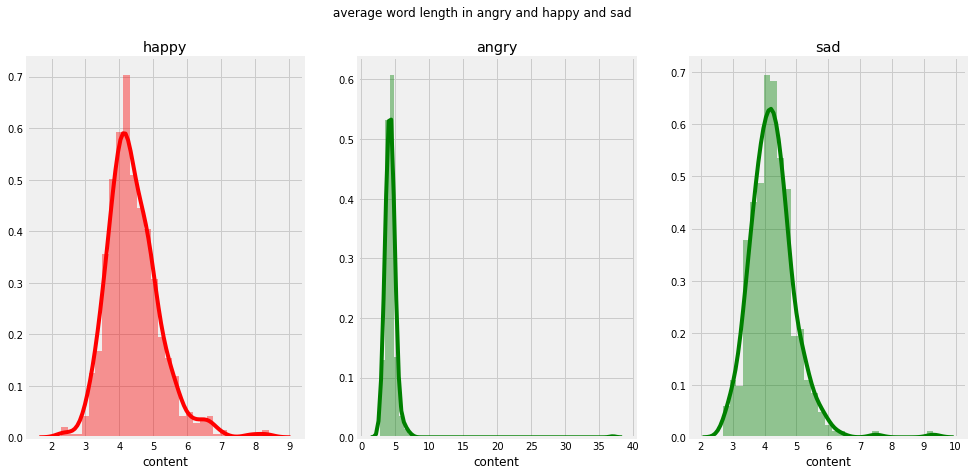

In [53]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,7))
word=df[df['sentiment']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('happy')
word=df[df['sentiment']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('angry')
word=df[df['sentiment']==2]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('sad')
fig.suptitle(' average word length in angry and happy and sad')

In [54]:
def create_corpus(sentiment):
    corpus=[]
    
    for x in df[df['sentiment']==sentiment]['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

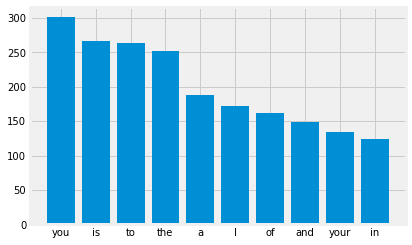

In [55]:
from collections import defaultdict
from collections import  Counter
corpus1=create_corpus(1)

dic=defaultdict(int)
for word in corpus1:
    if word in corpus1:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

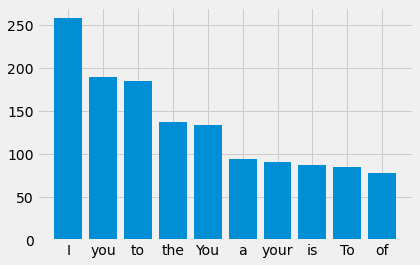

In [69]:
from collections import defaultdict
from collections import  Counter
corpus1=create_corpus(0)

dic=defaultdict(int)
for word in corpus1:
    if word in corpus1:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

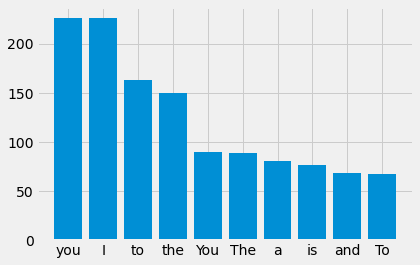

In [70]:
from collections import defaultdict
from collections import  Counter
corpus1=create_corpus(2)

dic=defaultdict(int)
for word in corpus1:
    if word in corpus1:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

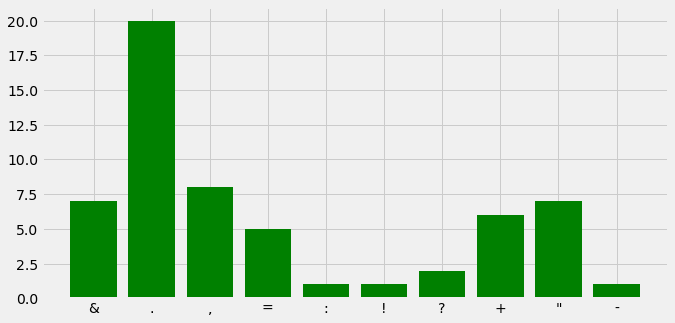

In [71]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

<BarContainer object of 7 artists>

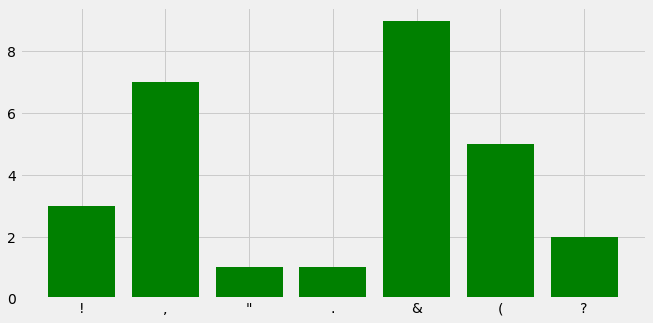

In [72]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

<BarContainer object of 8 artists>

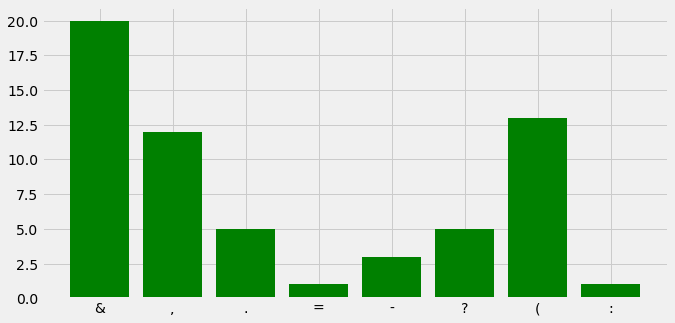

In [73]:
plt.figure(figsize=(10,5))
corpus=create_corpus(2)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

In [58]:
df_angry = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(angry).csv')
df_happy = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(happy).csv')
df_sad = pd.read_csv('E:/谷歌下载/kaggle-nlp/Emotion(sad).csv')
df_main = pd.concat([df_angry, df_happy, df_sad])
df_main = df_main.reset_index(drop=True)

# Remove duplicates
df_main = df_main.drop_duplicates(subset=['content', 'sentiment'])
df_main = df_main.reset_index(drop=True)

# Remove empty data
df_main['content'].replace('', np.nan, inplace=True)
df_main = df_main.dropna(subset = ['content'])
df_main = df_main.reset_index(drop=True)

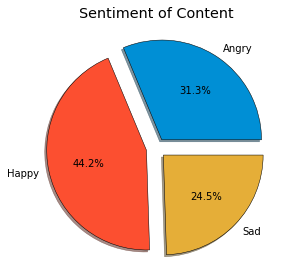

In [60]:
tot = df_main.shape[0]
vc = df_main['sentiment'].value_counts()

num_angry = vc['angry']
num_happy = vc['happy']
num_sad = vc['sad']

slices = [num_angry, num_happy, num_sad]
labeling = ['Angry','Happy', 'Sad']
explode = [0.1, 0.1, 0.1]
plt.pie(slices,explode=explode,shadow=True,autopct='%1.1f%%',labels=labeling,wedgeprops={'edgecolor':'black'})
plt.title('Sentiment of Content')
plt.tight_layout()
plt.show()

In [62]:
# plt.style.use('fivethirtyeight')

# df_main['word_count'] = df_main['content'].apply(lambda x: len(x.split()))

# fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))

# df_angry = df_main[df_main['sentiment'] == 'angry']
# word = df_angry['word_count']
# sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red', kde=False)
# ax1.set_title('Angry')

# df_happy = df_main[df_main['sentiment'] == 'happy']
# word = df_happy['word_count']
# sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green', kde=False)
# ax2.set_title('Happy')

# df_sad = df_main[df_main['sentiment'] == 'sad']
# word = df_sad['word_count']
# sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='blue', kde=False)
# ax3.set_title('Sad')

# fig.suptitle('Average word length by sentiment')
# plt.show()